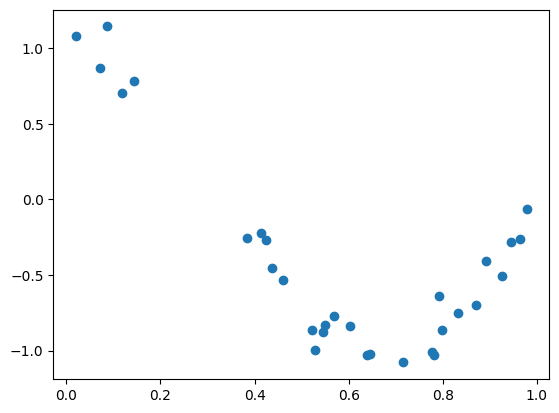

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


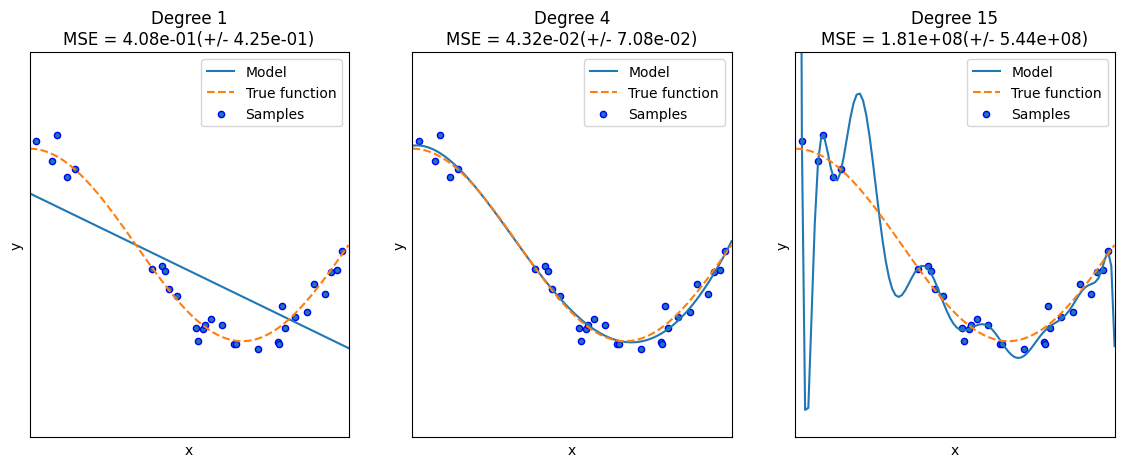

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.  -> 피처가 1개였지만 강제로 늘린다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [ ]:
# 가중치(회귀 계수)의 값이 너무 클 경우 줄여야 할 수 있다
# 15차시 의 경우 훈련세트에 대한 오차는 제로에 가깝지만 검증 세트에 대한 오차가 커짐

In [ ]:
# 규제 선형 회귀

alpha 10 : [-0.28 -0.18 -0.1  -0.05 -0.01  0.01  0.02  0.03  0.04  0.04  0.05  0.05
  0.05  0.05  0.05] 입니다.
alpha 10 MSE 는 0.48 입니다.
alpha 1 : [-1.26 -0.66 -0.24 -0.    0.12  0.19  0.21  0.22  0.21  0.2   0.19  0.18
  0.16  0.15  0.14] 입니다.
alpha 1 MSE 는 0.22 입니다.
alpha 0.1 : [-2.8  -0.98  0.11  0.58  0.71  0.67  0.56  0.42  0.29  0.16  0.05 -0.05
 -0.13 -0.2  -0.25] 입니다.
alpha 0.1 MSE 는 0.06 입니다.
alpha 0.01 : [-3.43 -1.29  0.39  1.09  1.2   1.01  0.71  0.41  0.15 -0.05 -0.2  -0.29
 -0.34 -0.35 -0.33] 입니다.
alpha 0.01 MSE 는 0.02 입니다.
alpha 1e-13 : [-1.861000e+01  4.241900e+02 -4.676300e+03  2.513646e+04 -7.021503e+04
  9.268728e+04 -1.825666e+04 -7.259981e+04  1.637887e+04  6.829357e+04
  7.009640e+03 -6.383579e+04 -2.640426e+04  7.309953e+04 -2.702438e+04] 입니다.
alpha 1e-13 MSE 는 19.51 입니다.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.60394e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


alpha 0 : [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
alpha 0 MSE 는 181238256.78 입니다.


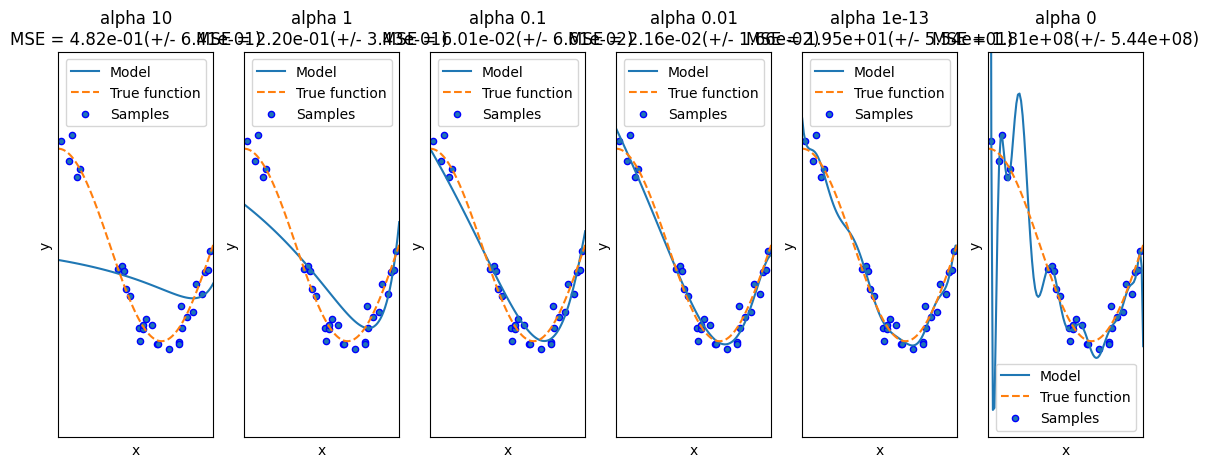

In [ ]:
# 15차수 데이터를 만들어 릿지로 선형 회귀
from sklearn.linear_model import Ridge

plt.figure(figsize=(14, 5))
alphas = [10, 1, 0.1, 0.01, 0.0000000000001, 0]
# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(alphas)):
    ax = plt.subplot(1, len(alphas), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    ridge = Ridge(alpha=alphas[i])
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", ridge)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('alpha {0} : {1} 입니다.'.format(alphas[i], np.round(coefficients, 2)))
    print('alpha {0} MSE 는 {1:.2f} 입니다.'.format(alphas[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("alpha {}\nMSE = {:.2e}(+/- {:.2e})".format(alphas[i], -scores.mean(), scores.std()))

plt.show()

# alpha 10 : 가중치들의 크기가 작아짐, 변동성에 제한을 과하게. 거의 과소적합
# aplha 1 : 가중치들이 약간 커짐. 조금 더 복잡하게 분석하기 시작
# alpha 0.1 -> 0.01 로 갈 수록 가중치도 커지며 복잡도 증가
# alpha 가 0이면 그냥 선형 회귀와 비슷

In [ ]:
# 규제 선형회귀를 통한 보스턴 주택 가격 예측

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # 사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
boston_df = pd.DataFrame(
    data=data,
    columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
)

boston_df['PRICE']=target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# degree= 3으로 준 상태에서의 linearregression 확인

In [ ]:
from sklearn.metrics import mean_squared_error

def print_score(model, test_data, y_test):
  pred = model.predict(test_data)
  mse = mean_squared_error(y_test, pred)
  print("\nMSE : {:.3f}".format(mse))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

boston_poly = PolynomialFeatures(degree=3,include_bias=False)

X_train, X_test, y_train, y_test = train_test_split(
    boston_df.drop("PRICE", axis =1),
    boston_df['PRICE'],
    test_size =0.2,
    random_state=42
)

X_train_3 = boston_poly.fit_transform(X_train)
X_test_3 = boston_poly.transform(X_test)

In [ ]:
X_train_3.shape, X_test_3.shape

((404, 559), (102, 559))

In [ ]:
#linearRegression 모델링

from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression().fit(X_train_3, y_train)
print_score(lr_reg, X_train_3, y_train) # 훈련 세트에 대한 MSE
print_score(lr_reg, X_test_3, y_test) # 테스트 세트에 대한 MSE

## 완벽한 과대적합 상태


MSE : 0.000

MSE : 129847.995


In [ ]:
# 가중치 확인
lr_reg.coef_

array([-7.51886506e-01, -3.80909396e+00, -1.06645442e+00, -2.14848458e-03,
       -4.77764291e-02, -4.12817415e-01,  5.19697092e+01, -2.49332378e+00,
        3.47515164e+00,  2.05253674e+01,  1.50290326e+00, -1.97278841e+01,
        3.23291414e-01, -1.15914767e+01, -1.06288961e+01,  1.85791929e+00,
       -9.34481016e-03,  1.87630138e+00,  5.97462993e+00, -7.09135741e+00,
       -9.83862902e+00,  5.61231782e+00,  3.02785956e+00, -8.27344044e+00,
       -1.83110683e+00, -2.02973592e+01, -1.57726454e+00, -1.37901955e+01,
       -2.45327477e-03, -7.90415760e+00,  9.33196579e+00, -1.15835208e+00,
        1.12385316e+01, -6.82716921e+00,  8.67243435e-01,  9.19531105e-02,
       -1.83479749e-01, -4.23331033e+00, -1.77800582e+01, -1.12536653e-02,
        1.31358386e+00, -3.64615246e+01, -1.42562721e+01,  7.57016398e+00,
       -9.52876608e+00,  5.62807062e+00, -1.27710321e+01, -1.46435984e+00,
        2.31063786e+01, -2.17709203e-03, -1.78582665e-04, -6.33504839e-03,
       -6.64131822e-02,  

In [ ]:
# ridge를 이용한 가중치 규제

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=10).fit(X_train_3, y_train)

print_score(ridge_reg, X_train_3, y_train)
print_score(ridge_reg, X_test_3, y_test)


MSE : 3.316

MSE : 169.674


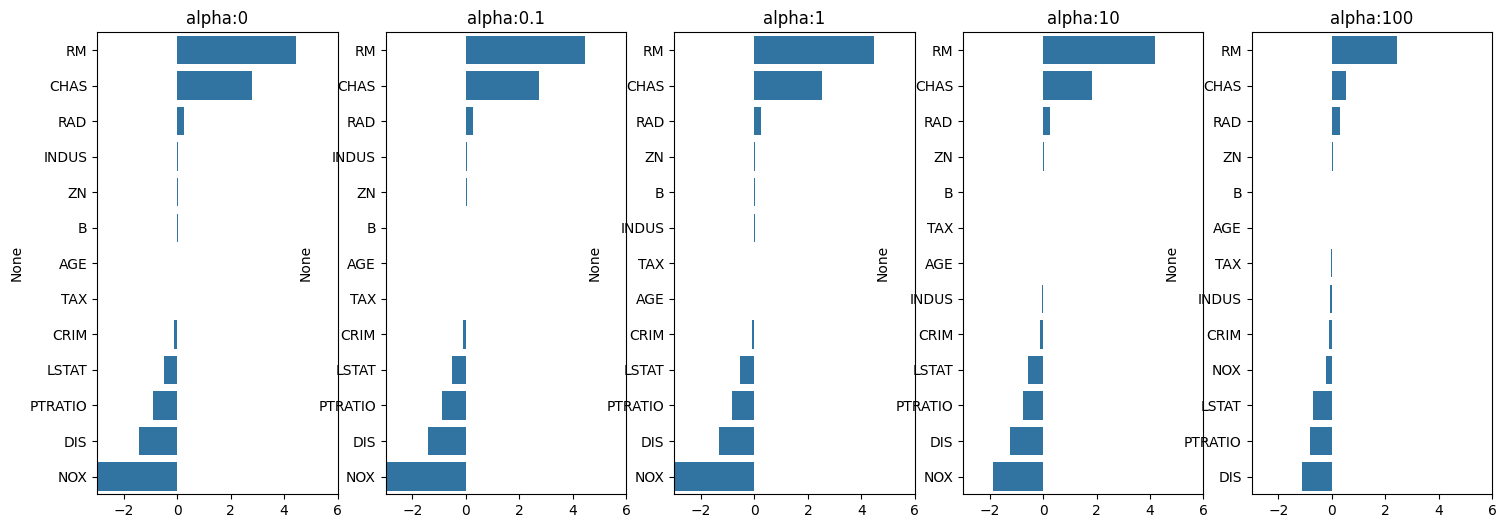

In [ ]:
# 릿지 알고리즘

alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
# Lasso를 이용한 규제 선형회귀

In [ ]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(alpha-10).fit(X_train,y_train)

In [ ]:
lr_lasso.coef_ # coef에 가중치 값 들어있음

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02080222,
       -0.        ,  0.00719532, -0.        ])

In [ ]:
lr_ridge = Ridge(alpha=10).fit(X_train, y_train)
lr_ridge.coef_

array([-0.10713363,  0.03555248, -0.02627747,  1.81329133, -1.88924475,
        4.19532572, -0.01534126, -1.23262135,  0.24803063, -0.01274419,
       -0.76176896,  0.01283334, -0.561835  ])

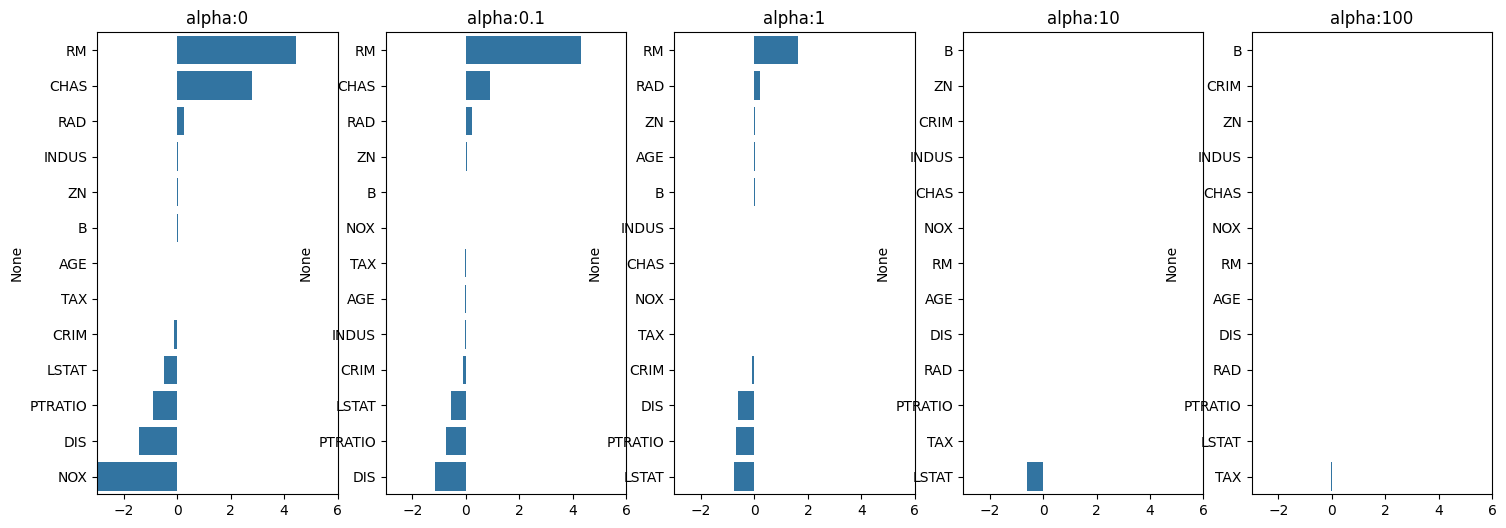

In [ ]:
# 라쏘 시각화

alphas = [0 , 0.1 , 1 , 10 , 100]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train , y_train)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=lasso.coef_ , index=X_train.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()
#릿지는 가중치를 살리지만, 라쏘의 경우 가중치를 살리지 않은 요소들을 볼 수 있다.